<a href="https://colab.research.google.com/github/esgiraldop/machine-learning/blob/master/Tarea4/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#To mount drive for workspace. 
from google.colab import drive

#This will prompt for authorization.
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.cm as cm
import random as rd
import seaborn as sns
sns.set()

# Borrar despues de terminar ejemplo
from sklearn import datasets

# Para k incremental
from sklearn.metrics import pairwise_distances
from numpy import zeros
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
path_to_datos = '/content/drive/My Drive/CursoMLAvanzado/Estudiantes/Luis-Vesga-Erick-Giraldo/Tarea 4/Motor_Completo+ruido.csv';

motorData = pd.read_csv(path_to_datos, sep = ';', skiprows = [1], header = 0, 
                        names = ['Clase[k]', 'rpm', 'temp', 'acel'])

y = motorData['Clase[k]']
X = motorData.drop(columns = ['Clase[k]'])
print(X)
X.info()

              rpm        temp       acel
0     1505.442505  197.880602  21.243581
1     1497.687211  199.034578  22.300807
2     1507.396785  192.519874  21.164998
3     1516.307756  197.206980  21.558114
4     1488.131738  194.901988  22.167737
...           ...         ...        ...
5094  2724.651280  371.633927  64.998009
5095  2722.150769  371.025653  65.090376
5096  2738.555164  369.844523  64.916607
5097  2734.392516  374.215392  64.752140
5098  2720.868999  374.197576  65.059723

[5099 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rpm     5099 non-null   float64
 1   temp    5099 non-null   float64
 2   acel    5099 non-null   float64
dtypes: float64(3)
memory usage: 119.6 KB


           rpm      temp      acel
rpm   1.000000  0.612042  0.814949
temp  0.612042  1.000000  0.936044
acel  0.814949  0.936044  1.000000


<function matplotlib.pyplot.show>

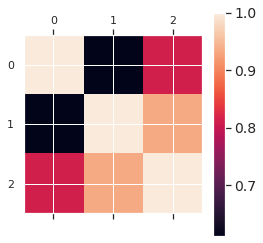

In [5]:
# correlation matrix
print(X.corr())
plt.matshow(X.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.show

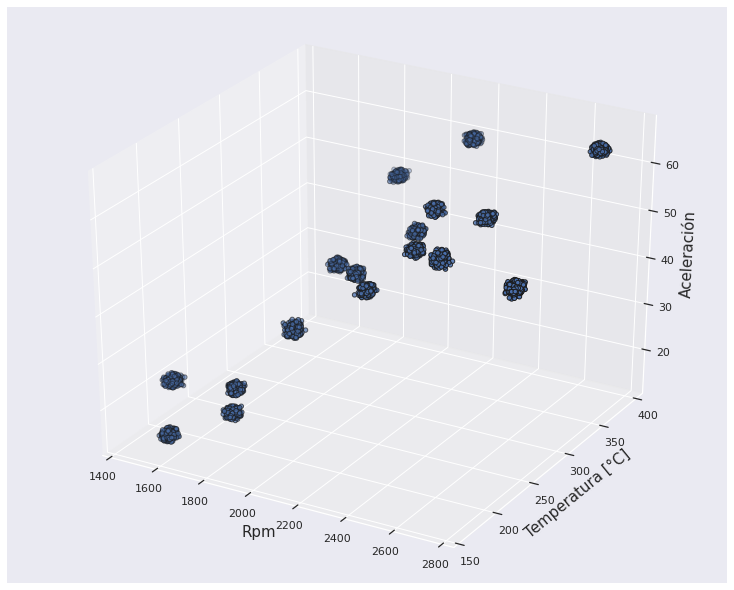

In [6]:
# plotting data in 3D for visualization

fig = plt.figure(figsize = [10,8])
ax = Axes3D(fig)
ax.scatter(X.iloc[1:,0],X.iloc[1:,1],X.iloc[1:,2], cmap = plt.cm.nipy_spectral,
           edgecolor = 'k')
ax.set_xlabel('Rpm', fontsize = 15)
ax.set_ylabel('Temperatura [°C]', fontsize = 15)
ax.set_zlabel('Aceleración', fontsize = 15)
plt.show()


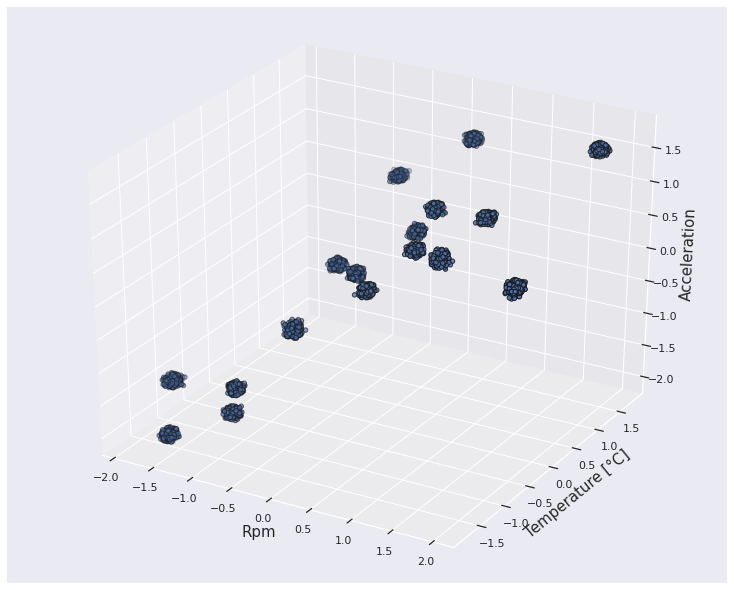

In [7]:
#standardizing X for appliying DBSCAN

X_array = StandardScaler().fit_transform(X)

fig = plt.figure(figsize = [10,8])
ax = Axes3D(fig)
ax.scatter(X_array[1:,0], X_array[1:,1], X_array[1:,2], cmap = plt.cm.nipy_spectral,
           edgecolor = 'k')
ax.set_xlabel('Rpm', fontsize = 15)
ax.set_ylabel('Temperature [°C]', fontsize = 15)
ax.set_zlabel('Acceleration', fontsize = 15)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Add

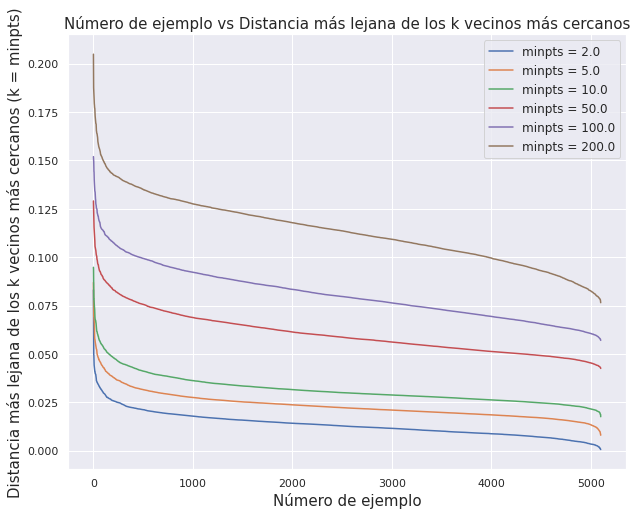

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


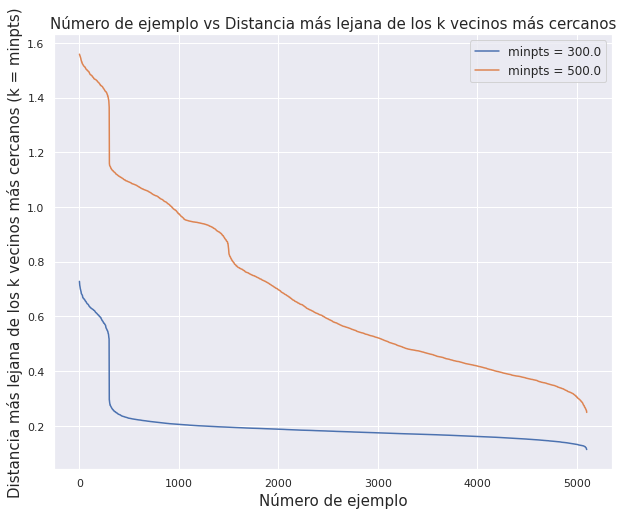

In [8]:
# estimating minimum points parameter for the knn algorithm through plotting some elbow plots
minpts = [2, 5, 10, 50, 100, 200, 300, 500]
plt.figure(figsize = [10,8])
for i in minpts:
  min_samples = i
  k = min_samples if min_samples > 2 else 2 # selecting the max num of nearest neighbors for the elbow plot
  nbrs = NearestNeighbors(n_neighbors = k).fit(X_array)
  distances, indices = nbrs.kneighbors(X_array)

  X['knn farthest distance'] = distances[:,-1]
  knnDist_sorted = X.sort_values('knn farthest distance', ascending = False).reset_index()[['knn farthest distance']]
  ax = plt.subplot(1,1,1)
  ax.plot(knnDist_sorted, label = 'minpts = %1.1f' %i)
  plt.title('Número de ejemplo vs Distancia más lejana de los k vecinos más cercanos', fontsize = 15)
  ax.legend(fontsize = 12)
  if i == 2:
    plt.xlabel('Número de ejemplo', fontsize = 15)
    plt.ylabel('Distancia más lejana de los k vecinos más cercanos (k = minpts)', fontsize = 15)
    plt.grid(True)

  if i == 200:
    plt.show()
    plt.figure(figsize = [10,8])
    plt.xlabel('Número de ejemplo', fontsize = 15)
    plt.ylabel('Distancia más lejana de los k vecinos más cercanos (k = minpts)', fontsize = 15)
    plt.grid(True)


**El cambio principal sobre el código se hizo en esta parte...**

In [0]:
# selecting the radiuses of the previous elbow plots
radiuses = [0.035, 0.04, 0.05, 0.09, 0.12, 0.15, 0.25, 1.15]
minpts = [2, 5, 10, 50, 100, 200, 300, 500]

# Applying DBSCAN for all of the radiuses and minpts and calculating silhouette score
count = 0

# Arguments for external metrics
labels_true = np.array(y-1)

outliers = np.zeros_like(radiuses)

# Initializing internal metrics
silhouette =np.zeros_like(radiuses)
calinski_harabasz = np.zeros_like(radiuses)
davies_bouldin = np.zeros_like(radiuses)

# Initializing external metrics
v_measure = []
fowlkes_mallows = []

for i, j in zip(minpts, radiuses):
  min_samples = i
  eps = j
  dbscan = DBSCAN(eps = eps, metric = 'euclidean', algorithm = 'auto',
                  min_samples = min_samples).fit(X_array)
  labels_pred = dbscan.labels_
  
  # Computing outliers
  outliers[count] = len(np.where(labels_pred == -1)[0])

  # Computing internal metrics

  # Silhouette score
  silhouette[count] = metrics.silhouette_score(X_array, labels_pred)
  # Calinski_Harabasz score
  calinski_harabasz[count] = metrics.calinski_harabasz_score(X_array, labels_pred)
  # Davies-Bouldin index
  davies_bouldin[count] = metrics.davies_bouldin_score(X_array, labels_pred)
  count = count + 1

  # Computing external metrics
  
  # V-measure
  v_measure = np.append(v_measure, metrics.v_measure_score(labels_true, labels_pred))
  # Fowlkes-Mallows coefficient
  fowlkes_mallows = np.append(fowlkes_mallows, metrics.fowlkes_mallows_score(labels_true, labels_pred))

In [23]:
print('Coeficientes de silueta: \n', np.round(silhouette, 2))
print('Coeficientes de Calinski-Harabasz: \n', np.round(calinski_harabasz/1000, 2))
print('Coeficientes de Davies-Bouldin : \n', np.round(davies_bouldin, 2))
print('Cantidad de outliers : \n', np.round(outliers, 2))
print('Coeficientes V-measure: \n', np.round(v_measure, 2))
print('Coeficientes Fowlkes-Mallows: \n', np.round(fowlkes_mallows, 2))

Coeficientes de silueta: 
 [0.69 0.82 0.82 0.82 0.82 0.83 0.8  0.34]
Coeficientes de Calinski-Harabasz: 
 [ 25.17  60.09 100.45 177.02 177.02 121.67  66.01   1.08]
Coeficientes de Davies-Bouldin : 
 [1.54 1.18 1.02 0.26 0.26 0.25 0.29 0.49]
Cantidad de outliers : 
 [ 41.  26.  14.   0.   0.   0. 299. 300.]
Coeficientes V-measure: 
 [0.99 0.99 1.   1.   1.   0.99 0.95 0.15]
Coeficientes Fowlkes-Mallows: 
 [0.99 0.99 1.   1.   1.   0.95 0.86 0.26]


**... y en esta parte.**

<Figure size 432x288 with 0 Axes>

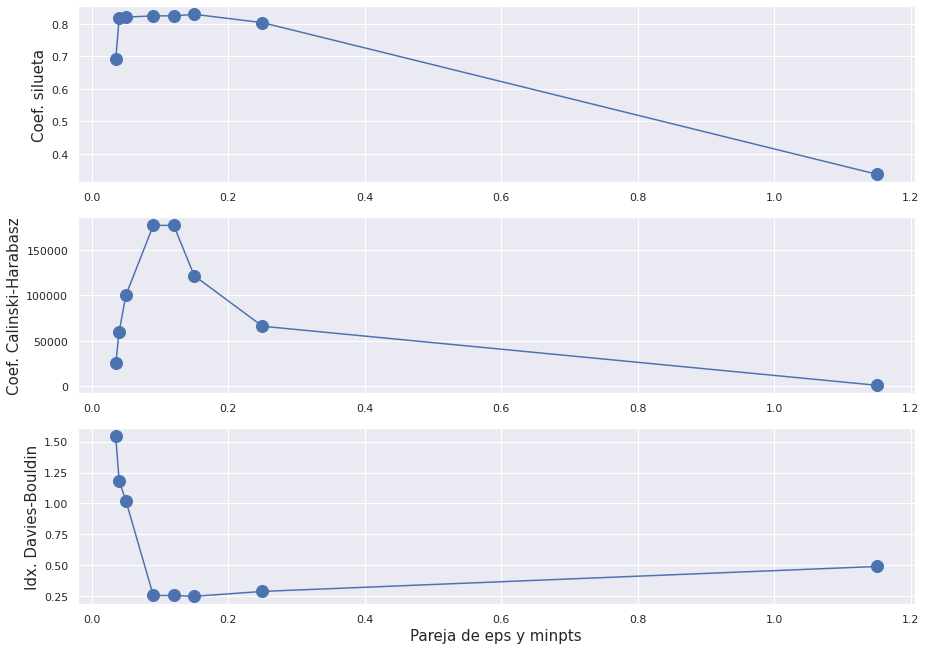

<Figure size 432x288 with 0 Axes>

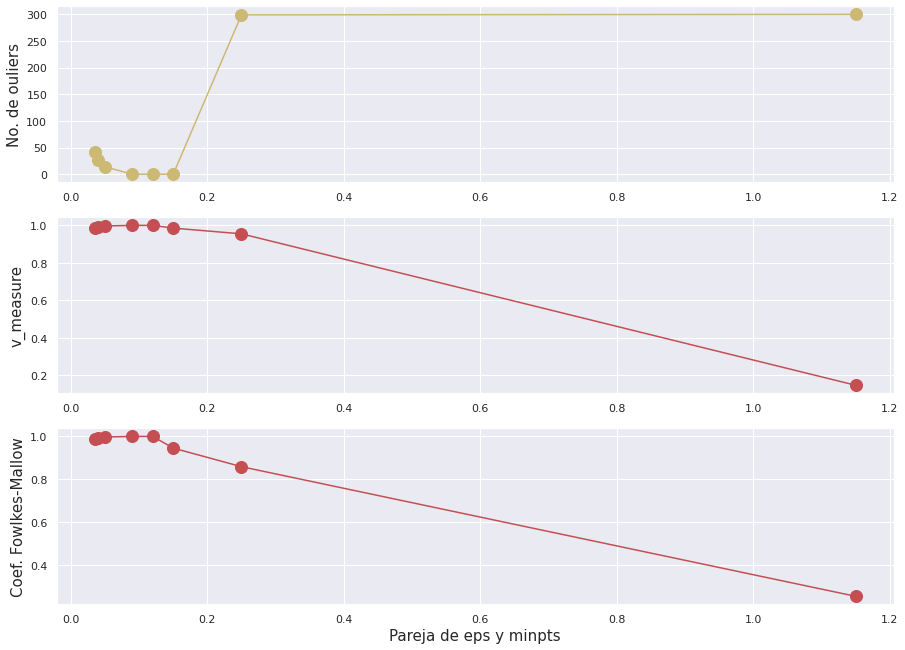

In [18]:
plt.figure()
fig, axs = plt.subplots(3,1, figsize = [15,11])

# Plotting the internal metrics

# Plotting the silhouette score
axs[0].plot(radiuses, silhouette, 'bo-', markersize = 12)
axs[0].set_ylabel('Coef. silueta', fontsize = 15)
# Plotting the Calinski_Harabasz score
axs[1].plot(radiuses, calinski_harabasz, 'bo-', markersize = 12)
axs[1].set_ylabel('Coef. Calinski-Harabasz', fontsize = 15)
# Plotting the Davies-Bouldin score
axs[2].plot(radiuses, davies_bouldin, 'bo-', markersize = 12)
axs[2].set_xlabel('Pareja de eps y minpts', fontsize = 15)
axs[2].set_ylabel('Idx. Davies-Bouldin', fontsize = 15)

plt.show()

plt.figure()
fig, axs = plt.subplots(3,1, figsize = [15,11])

# Plotting numer of outliers

axs[0].plot(radiuses, outliers, 'yo-', markersize = 12)
axs[0].set_ylabel('No. de ouliers', fontsize = 15)

# Plotting the external metrics

# Plotting the v_measure
axs[1].plot(radiuses, v_measure, 'ro-', markersize = 12)
axs[1].set_ylabel('v_measure', fontsize = 15)
# Plotting the Fowlkes-Mallows coefficient
axs[2].plot(radiuses, fowlkes_mallows, 'ro-', markersize = 12)
axs[2].set_ylabel('Coef. Fowlkes-Mallow', fontsize = 15)
axs[2].set_xlabel('Pareja de eps y minpts', fontsize = 15)
plt.show()

The combination of 'eps' and 'min_samples' with the highest silhouette score according to the previous plot is 0.12 and 100 respectively

In [11]:
eps = 0.12
min_samples = 100
# appliying DBSCAN
dbscan = DBSCAN(eps = eps, metric = 'euclidean', algorithm = 'auto',
                min_samples = min_samples).fit(X_array)
corepts = np.zeros_like(dbscan.labels_, dtype = bool)
corepts[dbscan.core_sample_indices_] = True
outlierPositions = np.where(corepts == False)
labels = dbscan.labels_

numLabelsNoNoise = len(set(labels)) - (1 if -1 in labels else 0)
numLabels = set(labels)


print('Labels de los clusters creados incluyendo outliers:\n', list(numLabels))
print('Número de clusters: ', len(numLabels))
print('Número de clusters ignorando el ruido: ', numLabelsNoNoise)

posOutliers = np.where(labels == -1)

if np.size(posOutliers) == 0:
  print('Número de datos outliers: ', 0)
else:
  print('Número de datos outliers: len(posOutliers[0])')
  print('Datos outliers: ', posOutliers[0])

Labels de los clusters creados incluyendo outliers:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Número de clusters:  17
Número de clusters ignorando el ruido:  17
Número de datos outliers:  0


Text(0.5, 0.92, 'Estimated number of clusters: 17')

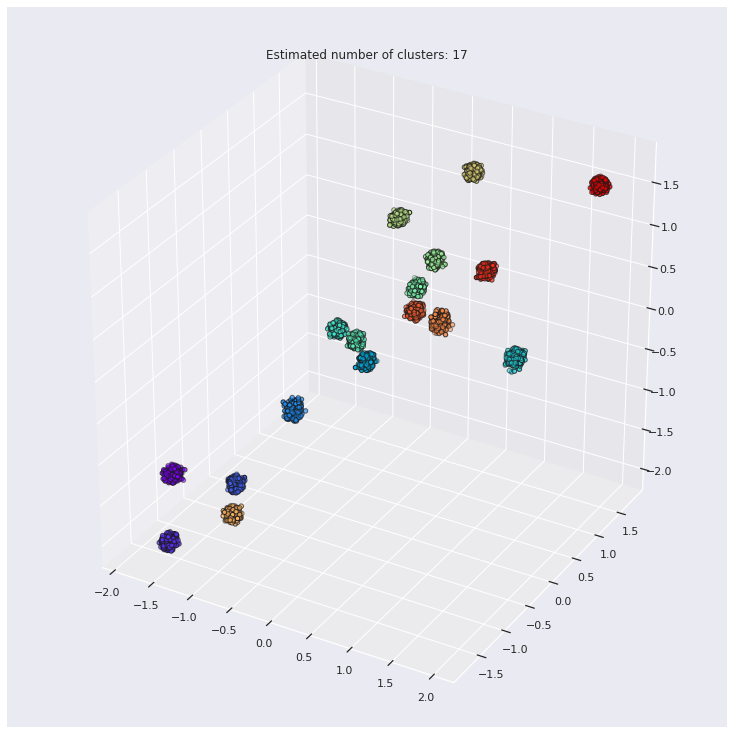

In [12]:
fig = plt.figure(figsize = [10,10])
ax = Axes3D(fig)
randlist = np.zeros(len(numLabels))

# generating matrix for colors
num = np.arange(len(numLabels))
ys = [i+num+(i*num)**2 for i in range(17)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))

# assigning colors to clusters.
for i in numLabels:
    
    pointColor = colors[i]
    
    if i == -1:
        pointColor = [1, 0, 0, 1]
    clusterMember = (labels == i)
    
    xy = X_array[clusterMember & corepts]
    ax.scatter(xy[:, 0], xy[:,1], xy[:,2], 'o', color = tuple(pointColor), cmap = plt.cm.nipy_spectral,
           edgecolor = 'k')
    
    xy = X_array[clusterMember & ~corepts]
    ax.scatter(xy[:,0], xy[:,1], xy[:,2], 'o', color = tuple(pointColor), cmap = plt.cm.nipy_spectral,
           edgecolor = 'k')
    
plt.title('Estimated number of clusters: %d' % numLabelsNoNoise)

#Evaluando métricas internas

## Evaluando el coeficiente de silueta

---



Silhouette score:  [0.86259375 0.8845875  0.83784885 ... 0.9304177  0.94898113 0.95348107]
Coeficiente de solueta promedio:  0.8239120973240334
Desviación estandar del coeficiente de silueta:  0.07869511985250241


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


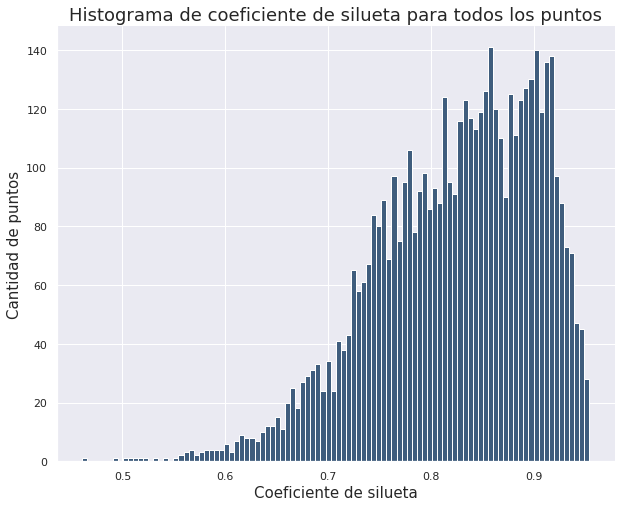

In [13]:
samplesSilhouetteScore = metrics.silhouette_samples(X_array, labels, metric = 'euclidean')
meanSilhouetteScore = metrics.silhouette_score(X_array, labels, metric = 'euclidean')
print('Silhouette score: ', samplesSilhouetteScore)

plt.figure(figsize = (10,8))
plt.hist(samplesSilhouetteScore, bins = 100, color="#3F5D7D")
plt.title('Histograma de coeficiente de silueta para todos los puntos', fontsize = 18)
plt.xlabel('Coeficiente de silueta', fontsize = 15)
plt.ylabel('Cantidad de puntos', fontsize = 15)

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

# Mean silhouette score
print('Coeficiente de solueta promedio: ', meanSilhouetteScore)
print('Desviación estandar del coeficiente de silueta: ', np.std(samplesSilhouetteScore))

## Evaluando la matriz de similitud

# Evaluando métricas externas

In [14]:
y_pred = labels
y_true = np.array(y-1)

# Recall numLabels has the actual classes, including outliers
# numLabels_true will represent the labels of the actual classes
labels_true = np.array(y-1)

# Counting the number of actual classifications
typeLabels_true = labels_true[0]

for i in range(1,len(labels_true)):
  if labels_true[i] == labels_true[i-1]:
    continue
  elif labels_true[i] != labels_true[i-1] and np.size(np.where(typeLabels_true == labels_true[i])) == 0:
    typeLabels_true = np.append(typeLabels_true, labels_true[i])

numLabels_true = len(typeLabels_true)

print('Actual labels: ',typeLabels_true)
print('Number of actual labels including outliers: ', numLabels_true)

Actual labels:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Number of actual labels including outliers:  17


##Midiendo pureza

In [15]:
# Confusion matrix where rows are predicted clases and columns are actual classes

conf_mat = np.zeros([len(numLabels),numLabels_true])

#Data is in the same order and cluster number assignation is in increasing order 
  # from 0 to 16

# C_i are the predicted clusters, which ranges from 0 to 16 in this case
# T_i are the ground truth clusters, which also ranges from 0 to 16 in this case

for i in numLabels:  # Iterating throughout C_i
  # i is the label for each cluster according to the predicted clusterization
  clustPositions_true = np.where(y_true == i)[0]
  # clustPositions_true are the points belonging to a cluster T_i
  # Counting how many objects if C_i were classified as T_i
  for j in clustPositions_true:
    # If the point in the cluster C_i was classified in the correct cluster T_i, the 
      # point was correctly clasified, so it goes in the diagonal of the matrix...
    if y_pred[j] == i: 
      conf_mat[i,i] = conf_mat[i,i] + 1
    # ... otherwise, goes in the column where the actual T_i is, which is out of the
      # diagonal of the matrix.
    else:
      conf_mat[y_pred[j],i] = conf_mat[y_pred[j],i] + 1

print('The confusion matrix is: \n')
print(conf_mat)

The confusion matrix is: 

[[299.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.]
 [  0. 300.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.]
 [  0.   0. 300.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.]
 [  0.   0.   0. 300.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.]
 [  0.   0.   0.   0. 300.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.]
 [  0.   0.   0.   0.   0. 300.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 300.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 300.   0.   0.   0.   0.   0.   0.
    0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. 300.   0.   0.   0.   0.   0.
    0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 300.   0.   0.   0.   0.
    0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 300.   0.   0.   0.
 

In [16]:
MaxvaluePerCluster = np.amax(conf_mat, axis=0)
purityPerCluster = MaxvaluePerCluster/np.sum(conf_mat, axis=0)
totalPurity = np.sum(MaxvaluePerCluster)/len(y_pred)

print(f'El valor de pureza para cada cluster en order es: \n {purityPerCluster}')
print(f'El valor de pureza total es: \n {totalPurity}')

El valor de pureza para cada cluster en order es: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
El valor de pureza total es: 
 1.0


In [17]:
import sys
np.set_printoptions(threshold=1000)   # set threshold=sys.maxsize for showing all the vector

# y starts counting from 1, labels from 0, so i need to do y-1 in order to compare
Accuracy = metrics.accuracy_score(y_true, y_pred, normalize=True)*100
print('La exactitud es', Accuracy,'%')

La exactitud es 100.0 %
